# NLP Basics + Noam Choamsky's articles Sentiment Analysis

## Introduction

In this notebook, the following are to be covered:
- String manipulation
- Text Cleaning
- Text Analysis
- Sentiment Analysis

## String manipulation basics

In [1]:
# strings 

# double and single quotes
string1 = "hello world"
string2 = 'hello world'
string1 == string2

True

In [2]:
# multi-line strings can be made using triple quotes (using either double or single quotes)
multiLineStr1 = """check
this string is
looooooooooooooooooong"""

multiLineStr2 = '''check
this string is
looooooooooooooooooong'''

multiLineStr1 == multiLineStr2

True

In [3]:
# when print,newlines are printed
print(multiLineStr1)

check
this string is
looooooooooooooooooong


In [4]:
# when displaying the value, the newlines are shown
multiLineStr1

'check\nthis string is\nlooooooooooooooooooong'

In [5]:
# strings can be concatenated in several ways:
str1 = "implicit " "concatenation"
str2 = "using " + "a " + "plus " + "sign"

# this way is fastest and provides additional ways to format e.g. numbers
str3 = "or {} {} {} {:10.3f}".format("using", "fancy", "formatting", 100.123456)
print(str1)
print(str2)
print(str3)

implicit concatenation
using a plus sign
or using fancy formatting    100.123


In [6]:
# strings are immutable
str1 = "immutable"
# This will give TypeError: 'str' object does not support item assignment
str1[0] = "I"


TypeError: 'str' object does not support item assignment

In [7]:
# to modify a string, a new string must be created
str2 = "I{}".format(str1[1:])
print(str2)

Immutable


In [8]:
# Python has a builtin function to capitalize words
str2 = str1.title()
print(str2)

Immutable


In [9]:
# slices work as such [startIndex : endIndex : step]
# leaving out values gives the default value of startIndex = 0, endIndex = the end, 
# step = 1
print(str1[1:])
print(str1[1:] == str1[1:len("immutable"):1])

mmutable
True


In [10]:
# beginning of string
print(str1[0])

i


In [11]:
# negative values gives end of string
print(str1[-1])

e


In [12]:
# the start index is INCLUSIVE but the end index is EXCLUSIVE
print(str1[4:8])

tabl


In [13]:
# Text cleaning can be done using Regular expression
# The following website https://regexone.com/references/python has a rich interactive tutorial

import re # Regular expression package
import requests # mining data package
from bs4 import BeautifulSoup # parsing html data package

# In this exemple, we will first collect data about Noam choamsky 
r = requests.get("https://chomsky.info/articles/")
# convert to "soup" from BeautifulSoup to extract HTML stuff easily
soup = BeautifulSoup(r.text,"html5lib")

# Looking at the structure of the webpage, one way is to extract date and title seperately then combine them in a list
date_data = [listItem.text for item in soup.find('a') for listItem in soup.find_all('li')]
title_data = [item.find('a').text for item in soup.find_all('li')]
clean_data = []
for date,title in zip(date_data,title_data):
    try:
        item_split = date.split('.')
        clean_data.append([title.rstrip('.'), item_split[-2].lstrip(" ")])
    except:
        continue

print("There are {} articles".format(len(clean_data))) # Total number of articles
print(clean_data[0]) # first item in the list

There are 303 articles
['Independence of Journalism', 'January 7, 2017']


## Text Cleaning

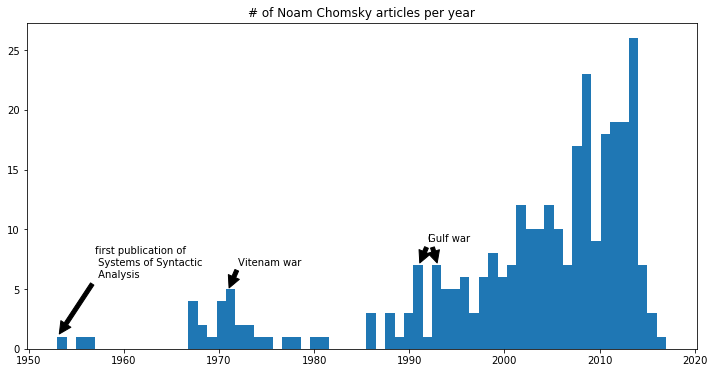

In [14]:
# Let's do some analysis...finally...
# Let's figure out what years Dr. Ptucha has been most prolific

# matplotlib is a plotting library for python
import matplotlib.pyplot as plt
# make the plots inline with the notebook
%matplotlib inline
# numpy is a numerical package for working with fast, efficient, 
# vectorized matrices like in MATLAB
import numpy as np

# look for numbers between 19xx and 20xx
yearRe = re.compile("19\d{2}|20\d{2}")

# make sure the matched object is not None to call the group() 
# function which returns the actual matched text
years = [int(yearRe.search(d[1]).group(0)) for d in clean_data if yearRe.search(d[1]) is not None]
numBins = max(years) - min(years) + 1

plt.figure(figsize=(12, 6))
plt.hist(years, numBins)
plt.title("# of Noam Chomsky articles per year")
plt.annotate("first publication of\n Systems of Syntactic\n Analysis",
                xy=(1953, 1), xytext=(1957, 6),
                arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("Vitenam war",
                xy=(1971, 5), xytext=(1972, 7),
                arrowprops=dict(facecolor='black', shrink=0.05))
plt.annotate("Gulf war",
                xy=(1991, 7), xytext=(1992, 9),
                arrowprops=dict(facecolor='black', shrink=0.1))
plt.annotate("l",
                xy=(1993, 7), xytext=(1992, 9),
                arrowprops=dict(facecolor='black', shrink=0.1))


plt.show()

In [18]:
# Skimming the data shows that there are some articles with more than one language, since we are interested in English
# we remove the other versions
for item in clean_data:
    if ('castellano' in item[0]):
        inx = clean_data.index(item)
        clean_data.pop(inx)
        years.pop(inx)
    elif ('Deutsch'in item[0]):
        inx = clean_data.index(item)
        clean_data.pop(inx)
        years.pop(inx)
    elif ('Japanese' in item[0]):
        inx = clean_data.index(item)
        clean_data.pop(inx)
        years.pop(inx)
        

In [19]:
clean_data

[['Independence of Journalism', 'January 7, 2017'],
 ['US Isolation', 'December 30, 2016'],
 ['An Eight Point Brief for LEV (Lesser Evil Voting)', 'June 15, 2016'],
 ['Noam Chomsky for Refugee Crisis', 'May 5, 2016'],
 ['Turkey continues to muzzle democracy’s watchdogs', 'November 12, 2015'],
 ['"The Iranian Threat" Who Is the Gravest Danger to World Peace?',
  'August 20, 2015'],
 ['One Day in the Life of a Reader of the New York Times', 'April 6, 2015'],
 ['Magna Carta Messed Up the World, Here’s How to Fix It', 'March 23, 2015'],
 ["A Brief History of America's Cold-Blooded, Terroristic Treatment of Cuba",
  'February 5, 2015'],
 ['Chomsky: Paris attacks show hypocrisy of West’s outrage',
  'January 20, 2015'],
 ['We Are All … Fill in the Blank', 'January 10, 2015'],
 ['Obama’s Historic Move', 'December 14, 2014'],
 ['Elites Have Forced America into a National Psychosis to Keep Us Embroiled in Imperial Wars',
  'December 2, 2014'],
 ['How the Young Are Indoctrinated to Obey', 'Decem

In [20]:
# cleaning the text using regular expression is a repetitive process with aim to have a text containing clean words
for item in clean_data:
    clean_data[clean_data.index(item)][0] = re.sub('[Uu]\.[Ss]\.*|U[Ss]\s|US-|[aA]merica\w*|AMERICA','USA ', item[0])
    clean_data[clean_data.index(item)][0] = re.sub("\/"," ", item[0])
    clean_data[clean_data.index(item)][0] = re.sub("[\"\”\“‘’\&\?]",'', item[0])
    clean_data[clean_data.index(item)][0] = re.sub("\?",'', item[0])
    clean_data[clean_data.index(item)][0] = re.sub("\'s|’s",'', item[0])
    clean_data[clean_data.index(item)][0] = re.sub("’\w+",'', item[0])
    clean_data[clean_data.index(item)][0] = re.sub('\(([^()]*)\)','', item[0])
    clean_data[clean_data.index(item)][0] = re.sub('[\-–…—]',' ', item[0])
    
        
    

In [21]:
clean_data

[['Independence of Journalism', 'January 7, 2017'],
 ['USA Isolation', 'December 30, 2016'],
 ['An Eight Point Brief for LEV ', 'June 15, 2016'],
 ['Noam Chomsky for Refugee Crisis', 'May 5, 2016'],
 ['Turkey continues to muzzle democracys watchdogs', 'November 12, 2015'],
 ['The Iranian Threat Who Is the Gravest Danger to World Peace',
  'August 20, 2015'],
 ['One Day in the Life of a Reader of the New York Times', 'April 6, 2015'],
 ['Magna Carta Messed Up the World, Heres How to Fix It', 'March 23, 2015'],
 ['A Brief History of USA  Cold Blooded, Terroristic Treatment of Cuba',
  'February 5, 2015'],
 ['Chomsky: Paris attacks show hypocrisy of Wests outrage',
  'January 20, 2015'],
 ['We Are All   Fill in the Blank', 'January 10, 2015'],
 ['Obamas Historic Move', 'December 14, 2014'],
 ['Elites Have Forced USA  into a National Psychosis to Keep USA Embroiled in Imperial Wars',
  'December 2, 2014'],
 ['How the Young Are Indoctrinated to Obey', 'December 1, 2014'],
 ['The Leading Ter

## Text Analysis

In [22]:
# We start by looking at the unigrams of titles
import nltk

# extract the title of every article
titles = [item[0] for item in clean_data]


# tokenize each title, lowercase the tokens to normalize everything, place them all in a list
tokens = [token.lower() for title in titles for token in nltk.word_tokenize(title) if token.isalpha()]
print(tokens[:10])

['independence', 'of', 'journalism', 'usa', 'isolation', 'an', 'eight', 'point', 'brief', 'for']


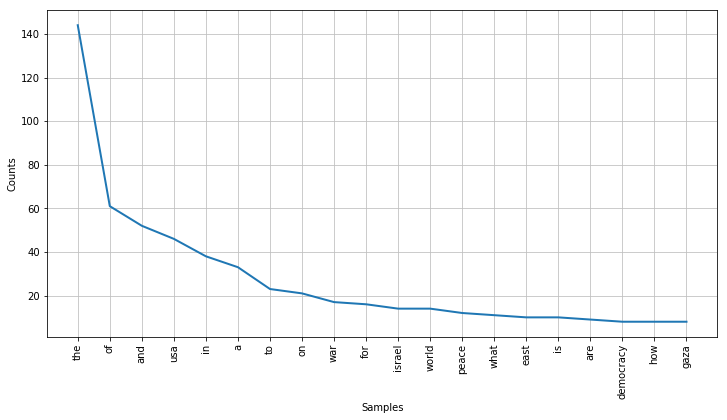

In [23]:
# First thing to do is to look at the count or frequency of words
# NLTK has a nice convenient class to do this called FreqDist, and Python also has collections.Counter() which would do the same thing
# in this example we use FreqDist 
frequencyDistribution = nltk.FreqDist(tokens)
plt.figure(figsize=(12, 6))
# plot the top 20 tokens
frequencyDistribution.plot(20)

In [24]:
# The plot shows a good start, however, there are words such as "the" or "of" that we don't want
# nltk has a collection of stopwords that we can use
from nltk.corpus import stopwords

stoplist = stopwords.words('english')
print(stoplist[:15])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours']


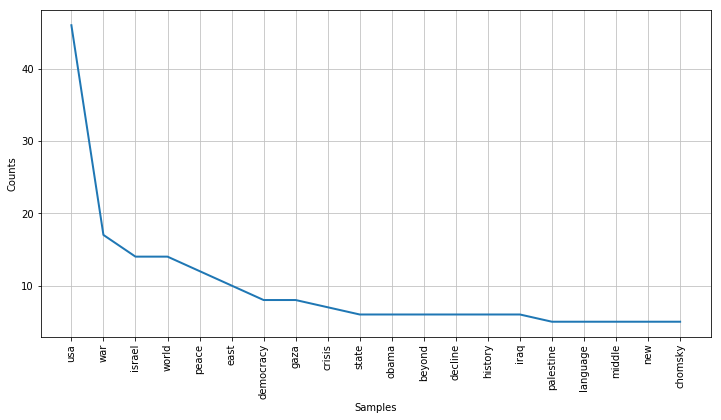

In [25]:
tokens = [token for token in tokens if token not in stoplist]
frequencyDistribution = nltk.FreqDist(tokens)
plt.figure(figsize=(12, 6))
# plot the top 20 tokens
frequencyDistribution.plot(20)

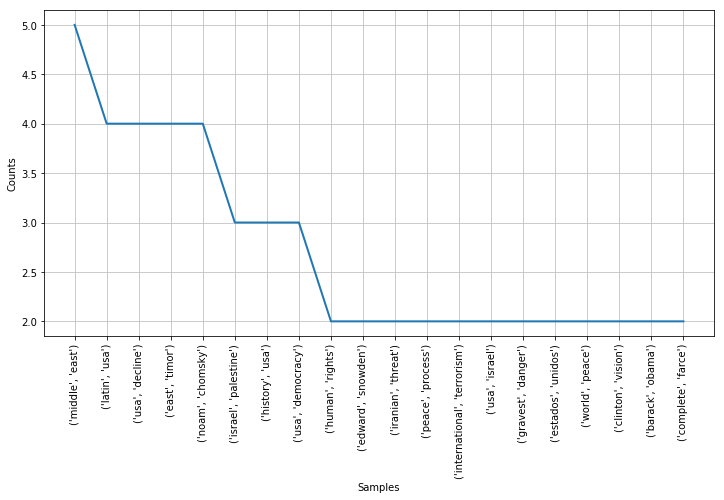

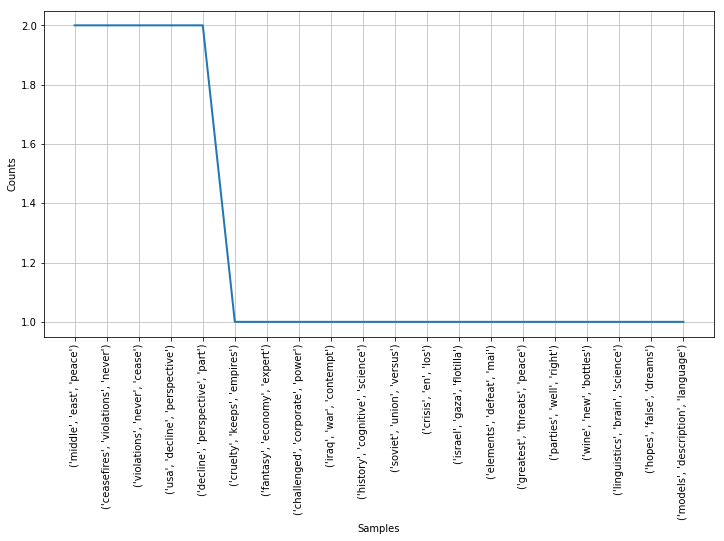

In [26]:
# Apparently Noam Choamsky is writes mostly about USA, WAR, Middle east and Peace
# One step furthere is to perform bigrams and trigrams 
from nltk.util import bigrams, trigrams
from itertools import chain

# we don't want to use the tokens all mashed together like before because we don't
# want to connect the last token in a title with the first token in a different 
# title, so we do it per title
tokensPerTitle = [nltk.word_tokenize(title) for title in titles]
tokensPerTitle = [[token.lower() for token in t if token.isalpha() and token.lower() not in stoplist] for t in tokensPerTitle]

# now we need to do some crazy python list unpacking which you might not understand
# but this is just making a single list of the bigrams of each title
b = list(chain(*[(list(bigrams(tokens))) for tokens in tokensPerTitle]))
# same with trigrams
t = list(chain(*[(list(trigrams(tokens))) for tokens in tokensPerTitle]))

fdist = nltk.FreqDist(b)
plt.figure(figsize=(12, 6))
# plot the top 20 bigrams
fdist.plot(20)

fdist = nltk.FreqDist(t)
plt.figure(figsize=(12, 6))
# plot the top 20 trigrams
fdist.plot(20)

## Sentiment Analysis

In [27]:
import pandas as pd

titles_l = [item[0].lower() for item in clean_data]
df = pd.DataFrame(titles_l, columns=['text'])
df['years'] = years


In [28]:
df.head()

,text,years
0,independence of journalism,2017
1,usa isolation,2016
2,an eight point brief for lev,2016
3,noam chomsky for refugee crisis,2016
4,turkey continues to muzzle democracys watchdogs,2015


In [29]:
from textblob import TextBlob

In [30]:
def analize_sentiment(text):
    '''
    Utility function to classify the polarity of a tweet
    using textblob.
    '''
    analysis = TextBlob(text)
    if analysis.sentiment.polarity >= 0.3:
        return 1
    elif analysis.sentiment.polarity < -0.1:
        return -1
    else:
        return 0

In [31]:
df['sentiment'] = df['text'].apply(analize_sentiment)

In [32]:
df.head()

,text,years,sentiment
0,independence of journalism,2017,0
1,usa isolation,2016,0
2,an eight point brief for lev,2016,0
3,noam chomsky for refugee crisis,2016,0
4,turkey continues to muzzle democracys watchdogs,2015,0


In [33]:
df['sentiment'].value_counts(normalize=True)*100

 0    83.505155
-1    10.309278
 1     6.185567
Name: sentiment, dtype: float64

Noam choamsky's articles seem to be neutral in general, even if there is some propotion of positive and negative sentiments, they almost cancel each other out

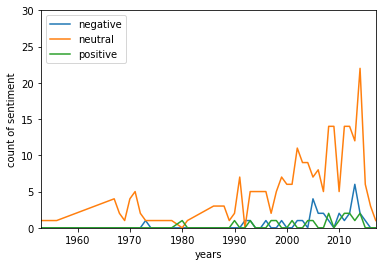

In [34]:
# Lets analyze the evolution of sentiments through the years
dd = pd.pivot_table(df,index='years',columns='sentiment',aggfunc='count',fill_value=0)
dd.columns = dd.columns.droplevel()
dd.columns = ['negative','neutral','positive']
dd.plot(x=dd.index,y=dd.columns, ylim=(0,30))
plt.ylabel('count of sentiment')
plt.legend(loc='upper left')

The graph shows that it is only from 1990 where the frequency of negative and positive sentiments started to increase, and in 2013 there was the highest negative sentiment peek as shown by the following articles titles:

In [35]:
for i in df['text'][(df['years']==dd['negative'].idxmax())&(df['sentiment']==-1)]:
    print(i)

the dangerous rogue states operating in the mideast   usa  and israel
hidden power and built form: the politics behind the architecture
middle east peace talks a complete farce
why the israel palestine negotiations are a complete farce
israels west bank plans will leave palestinians very little
the usa remains guilty in guatemala


When reading the titles of the articles, it seems like Noam choamsky is very concenred about what was happening in the Middle east and the peace talk process

However, the highest count of positive articles is two and it happened in 2008:

In [36]:
for i in df['text'][(df['years']==dd['positive'].idxmax())&(df['sentiment']==1)]:
    print(i)

good news, iraq and beyond
we own the world


Despite the sckiptisime that Naom Choamsky shows off about what's going on around the world, Iraq could be the solution for the peace talk in the middle east, and in the title "we own the world" carries some form of bravery and hope as of what is going to be for our future

Next, let's look at most common words used for both positive and negative sentiments

In [37]:
tokens_pos = []
for row in df[df['sentiment']==1].itertuples():
    for item in nltk.word_tokenize(row[1]):
        if item.isalpha():
            tokens_pos.append(item)

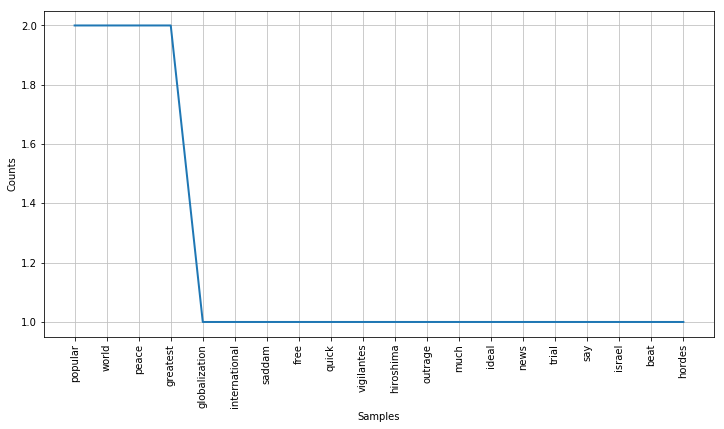

In [38]:
tokens = [token for token in tokens_pos if token not in stoplist]
frequencyDistribution = nltk.FreqDist(tokens)
plt.figure(figsize=(12, 6))
# plot the top 20 tokens
frequencyDistribution.plot(20)

In [39]:
tokens_neg = []
for row in df[df['sentiment']==-1].itertuples():
    for item in nltk.word_tokenize(row[1]):
        if item.isalpha():
            tokens_neg.append(item)

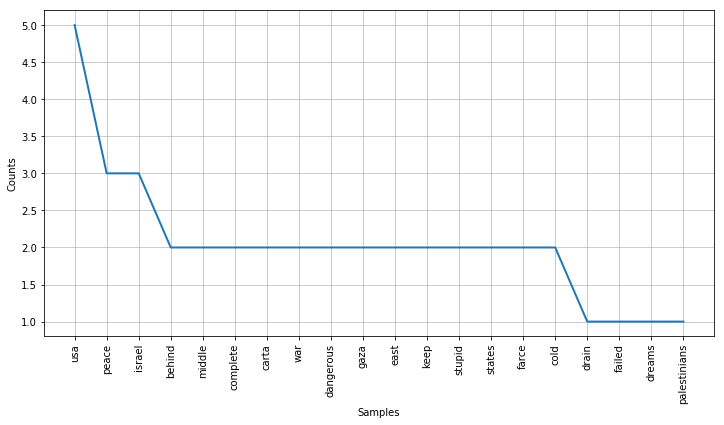

In [40]:
tokens = [token for token in tokens_neg if token not in stoplist]
frequencyDistribution = nltk.FreqDist(tokens)
plt.figure(figsize=(12, 6))
# plot the top 20 tokens
frequencyDistribution.plot(20)

It is clear that Noam Choamsky doesn't agree with the US policies in the middle east, and consider this region as a critical point for the a more stable peace around the globe. There is a sentiment of positive expectations and more peaceful world to come in the future